<a href="https://colab.research.google.com/github/smkmohsin/Yes-Bank-Stock-Closing-Price-Prediction/blob/main/Yes_Bank_Stock_Closing_Price_Prediction_Sheikh_Mohsin_Kader_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Yes Bank is a well-known bank in the Indian financial domain. Since 2018, it has been in the news because of the fraud case involving Rana Kapoor. Owing to this fact, it was interesting to see how that impacted the stock prices of the company and whether Time series models or any other predictive models can do justice to such situations. This dataset has monthly stock prices of the bank since its inception and includes closing, starting, highest, and lowest stock prices of every month. The main objective is to predict the stock’s closing price of the month.

#<b> Importing the libraries


In [94]:
# Importing the libraries
import numpy as np
import pandas as pd
from numpy import math

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [95]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [96]:
# Importing the dataset
dataset = pd.read_csv('/content/drive/MyDrive/Almabetter/Module 4/Capstone Project/data_YesBank_StockPrices.csv')

# <b> Data Inspection

In [97]:
dataset.head()

,Date,Open,High,Low,Close
0,Jul-05,13.00,14.00,11.25,12.46
1,Aug-05,12.58,14.88,12.55,13.42
2,Sep-05,13.48,14.87,12.27,13.30
3,Oct-05,13.20,14.47,12.40,12.99
4,Nov-05,13.35,13.88,12.88,13.41


In [98]:
dataset.tail()

,Date,Open,High,Low,Close
180,Jul-20,25.60,28.30,11.10,11.95
181,Aug-20,12.00,17.16,11.85,14.37
182,Sep-20,14.30,15.34,12.75,13.15
183,Oct-20,13.30,14.01,12.11,12.42
184,Nov-20,12.41,14.90,12.21,14.67


In [99]:
dataset.describe()

,Open,High,Low,Close
count,185.000000,185.000000,185.000000,185.000000
mean,105.541405,116.104324,94.947838,105.204703
std,98.879850,106.333497,91.219415,98.583153
min,10.000000,11.240000,5.550000,9.980000
25%,33.800000,36.140000,28.510000,33.450000
50%,62.980000,72.550000,58.000000,62.540000
75%,153.000000,169.190000,138.350000,153.300000
max,369.950000,404.000000,345.500000,367.900000


In [100]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185 entries, 0 to 184
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    185 non-null    object 
 1   Open    185 non-null    float64
 2   High    185 non-null    float64
 3   Low     185 non-null    float64
 4   Close   185 non-null    float64
dtypes: float64(4), object(1)
memory usage: 7.4+ KB


In [101]:
dataset.shape

(185, 5)

# <b>DataSet Information:</b>

**Date:** It contains month & year from July 2005 - November 2020.

**Open:** The open is the starting day of month of trading on a securities exchange or organized over-the-counter market. 

**High:** The high is the highest price at which a stock traded during a month.

**Low:** The low is the lowest price of the month.

**Close:** The close is a reference to the end of a trading session in the financial markets when the markets close for the day(Here it is for the month).


# <b> Exploratory Data Analysis

In [102]:
# Check null data
dataset.isna().sum()

Date     0
Open     0
High     0
Low      0
Close    0
dtype: int64

In [103]:
date_ = dataset['Date']

In [104]:
dataset = dataset.set_index('Date')

In [105]:
dataset.columns

Index(['Open', 'High', 'Low', 'Close'], dtype='object')

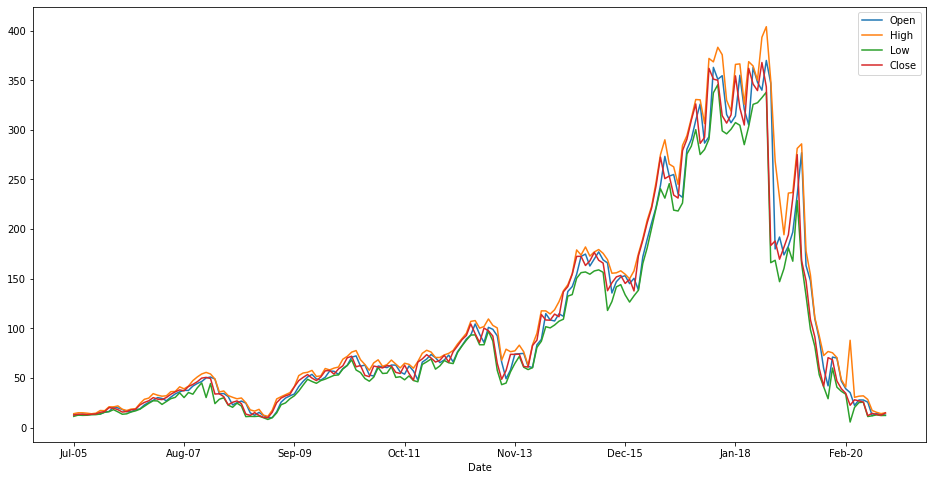

In [106]:
for col in dataset.columns[0:]:
    feature = dataset[col]
    feature.plot(figsize=(16, 8))
    plt.legend(dataset.columns)
plt.show()

In [107]:
# Create a variable to predict 'x' Months out into future
future_months = 3

This column will be the Dependent variable for predicting future close price. We are to train models to predict prices of future  by 3 months.

In [108]:
# Create a column 'Prediction' and shift 'x' Months for future prediction
dataset['Prediction'] = dataset[['Close']].shift(-future_months)

In [109]:
dataset

,Open,High,Low,Close,Prediction
Date,,,,,
Jul-05,13.00,14.00,11.25,12.46,12.99
Aug-05,12.58,14.88,12.55,13.42,13.41
Sep-05,13.48,14.87,12.27,13.30,13.71
Oct-05,13.20,14.47,12.40,12.99,15.33
Nov-05,13.35,13.88,12.88,13.41,16.12
...,...,...,...,...,...
Jul-20,25.60,28.30,11.10,11.95,12.42
Aug-20,12.00,17.16,11.85,14.37,14.67
Sep-20,14.30,15.34,12.75,13.15,NaN


In [110]:
dataset['Prediction'].fillna(0, inplace=True)

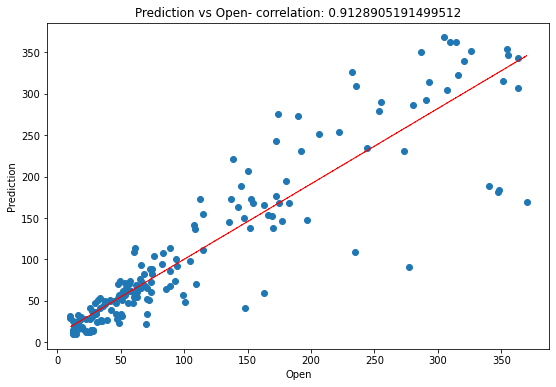

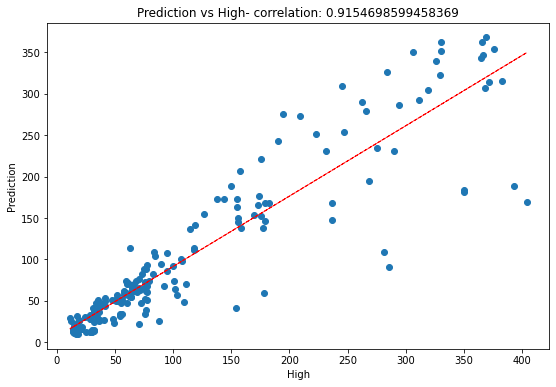

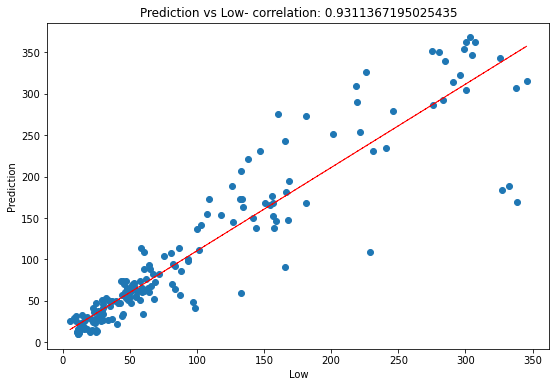

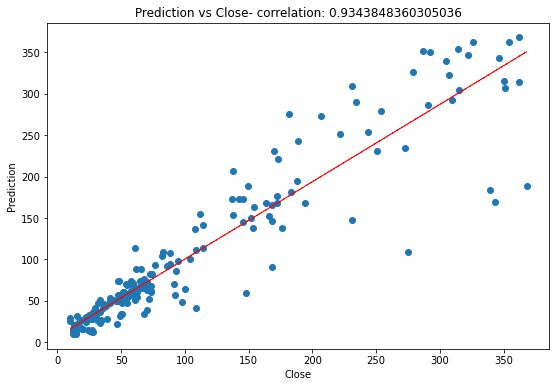

In [185]:
for col in dataset.columns[:-1]:
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    feature = dataset[col]
    label = dataset['Prediction']
    correlation = feature.corr(label)
    plt.scatter(x=feature, y=label)
    plt.xlabel(col)
    plt.ylabel('Prediction')
    ax.set_title('Prediction vs ' + col + '- correlation: ' + str(correlation))
    z = np.polyfit(dataset[col], dataset['Prediction'], 1)
    y_hat = np.poly1d(z)(dataset[col])

    plt.plot(dataset[col], y_hat, "r--", lw=1)

plt.show()

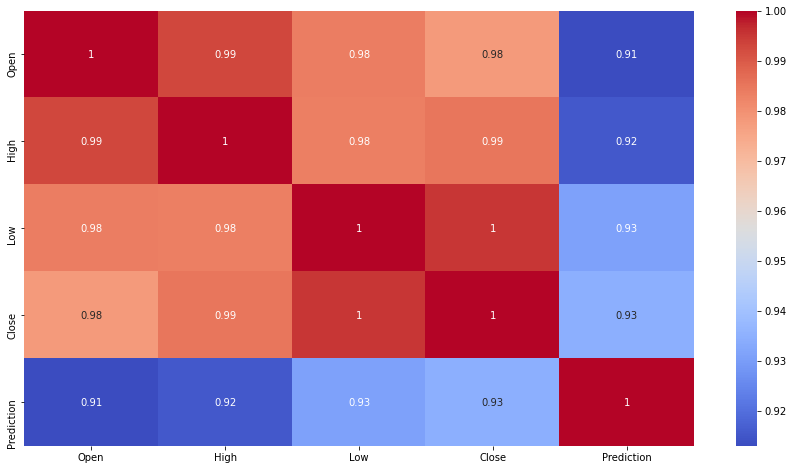

In [111]:
# Check Correlation
plt.figure(figsize=(15,8))
correlation = dataset.corr()
sns.heatmap(abs(correlation), annot=True, cmap='coolwarm')

###<b>VIF Analysis

In [112]:
# Check Multicollinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor


# Function for returning a Dataset after checking VIF
def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

In [186]:
calc_vif(dataset[[i for i in dataset.columns if i not in ['Prediction']]])

,variables,VIF
0,Open,288.504853
1,High,323.952468
2,Low,424.612257
3,Close,428.401649


In [188]:
calc_vif(dataset[[i for i in dataset.columns if i not in ['Prediction','Low','Open']]])

,variables,VIF
0,High,72.208493
1,Close,72.208493


In [115]:
# Create independent variable
X = dataset.iloc[:-future_months]['Close'].values

In [116]:
len(X)

182

In [117]:
# Reshape
X = X.reshape(X.shape[0],1)

In [118]:
# Create dependent variable
y = dataset['Prediction'][:-future_months].values

In [119]:
y

array([ 12.99,  13.41,  13.71,  15.33,  16.12,  20.08,  19.49,  18.03,
        15.62,  16.16,  17.84,  18.46,  22.78,  25.32,  26.97,  30.16,
        28.63,  28.14,  30.31,  33.51,  35.98,  37.93,  36.99,  41.36,
        43.48,  46.18,  49.81,  50.54,  49.42,  33.75,  34.06,  31.13,
        22.85,  25.45,  26.83,  24.13,  13.58,  12.26,  15.03,  12.24,
        10.26,   9.98,  15.45,  25.12,  29.68,  31.93,  33.45,  40.99,
        47.31,  50.57,  53.41,  49.84,  47.32,  50.97,  57.1 ,  57.57,
        53.83,  58.99,  62.22,  70.3 ,  71.86,  61.21,  62.54,  52.59,
        51.29,  61.98,  61.02,  60.07,  62.38,  62.13,  55.61,  54.5 ,
        62.9 ,  54.49,  47.72,  65.99,  69.14,  73.46,  70.07,  66.02,
        67.83,  72.85,  65.97,  76.44,  82.29,  88.48,  92.84, 104.41,
        94.5 ,  85.71, 100.28,  97.49,  92.2 ,  64.76,  48.65,  57.5 ,
        73.76,  73.74,  74.02,  61.59,  60.95,  82.7 ,  88.14, 113.89,
       108.38, 108.21, 114.33, 111.7 , 136.83, 142.08, 154.57, 172.5 ,
      

In [120]:
len(y)

182

## <b>Splitting the dataset into the Training set and Test set

In [121]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)
print(X_train.shape)
print(X_test.shape)

(145, 1)
(37, 1)


## <b>Training the Linear Regression model on the Training set

In [122]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression().fit(X_train, y_train)

In [123]:
lr.coef_

array([0.95764812])

In [124]:
lr.intercept_

6.590527485195054

In [125]:
lr_pred = lr.predict(X_test)

# <b> Visualization 

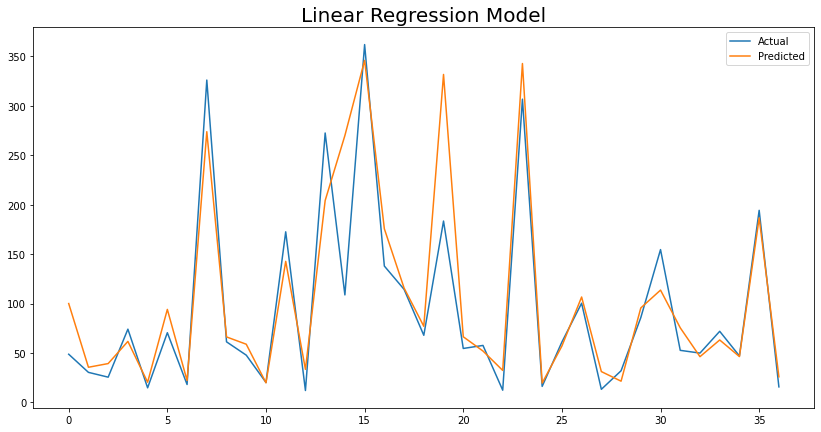

In [126]:
plt.figure(figsize=(14,7))
plt.plot(np.array((y_test)))
plt.plot((lr_pred))

plt.title('Linear Regression Model', fontsize= 20)
plt.legend(["Actual","Predicted"])
plt.show()

## <b>Evaluating the Model Performance

In [127]:
MSE  = mean_squared_error(y_test, lr_pred)
print("MSE :" , round(MSE,4))
RMSE = np.sqrt(MSE)
print("RMSE :" ,round(RMSE,4))

r2 = r2_score((y_test), (lr_pred))
print("R2 :" ,round(r2,4))
print("Adjusted R2 : ",round(1-(1-r2_score(y_test, lr_pred))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)),4))

MSE : 1816.7501
RMSE : 42.6234
R2 : 0.7853
Adjusted R2 :  0.7791


# <b> Implementing Lasso Regression

In [128]:
from sklearn.linear_model import Lasso
lasso  = Lasso(alpha=0.0001 , max_iter= 3000)
lasso.fit(X_train, y_train)

Lasso(alpha=0.0001, copy_X=True, fit_intercept=True, max_iter=3000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [129]:
lasso.score(X_train, y_train)

0.8881488146703735

In [130]:
lasso.coef_

array([0.95764811])

# <b> Grid Search Cross Validation for Lasso Regression </b>

In [131]:
### Cross validation
from sklearn.model_selection import GridSearchCV
lasso = Lasso()
parameters = {'alpha': [1e-15,1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,1,5,10,20,30,40,45,50,55,60,100,0.0014]}
lasso_regressor = GridSearchCV(lasso, parameters, scoring='neg_mean_squared_error', cv=5)
lasso_regressor.fit(X_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=1000, normalize=False, positive=False,
                             precompute=False, random_state=None,
                             selection='cyclic', tol=0.0001, warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': [1e-15, 1e-13, 1e-10, 1e-08, 1e-05, 0.0001,
                                   0.001, 0.01, 0.1, 1, 5, 10, 20, 30, 40, 45,
                                   50, 55, 60, 100, 0.0014]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='neg_mean_squared_error', verbose=0)

In [132]:
print("The best fit alpha value is found out to be :" ,lasso_regressor.best_params_)
print("\nUsing ",lasso_regressor.best_params_, " the negative mean squared error is: ", lasso_regressor.best_score_)

The best fit alpha value is found out to be : {'alpha': 1e-15}

Using  {'alpha': 1e-15}  the negative mean squared error is:  -1252.11052722401


In [133]:
y_pred_lasso = lasso_regressor.predict(X_test)

# <b> Visualization 

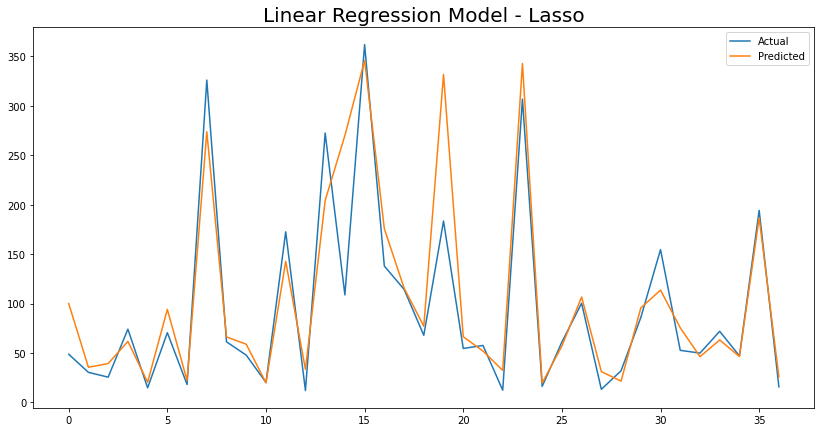

In [134]:
plt.figure(figsize=(14,7))
plt.plot((np.array(y_test)))
plt.plot((y_pred_lasso))

plt.title('Linear Regression Model - Lasso', fontsize= 20)
plt.legend(["Actual","Predicted"])
plt.show()

## <b>Evaluating the Model Performance

In [135]:
MSE  = mean_squared_error(y_test, y_pred_lasso)
print("MSE :" , round(MSE,4))
RMSE = np.sqrt(MSE)
print("RMSE :" ,round(RMSE,4))

r2 = r2_score((y_test), (y_pred_lasso))
print("R2 :" ,round(r2,4))
print("Adjusted R2 : ",round(1-(1-r2_score(y_test, y_pred_lasso))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)),4))

MSE : 1816.7501
RMSE : 42.6234
R2 : 0.7853
Adjusted R2 :  0.7791


# <b> Implementing Ridge Regression

In [136]:
from sklearn.linear_model import Ridge
ridge  = Ridge(alpha=0.1)

In [137]:
ridge.fit(X_train,y_train)

Ridge(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [138]:
ridge.score(X_train, y_train)

0.8881488146703688

In [139]:
y_pred_r = ridge.predict(X_test)

## <b>Evaluating the Model Performance

In [140]:
MSE  = mean_squared_error(y_test, y_pred_r)
print("MSE :" , round(MSE,4))
RMSE = np.sqrt(MSE)
print("RMSE :" ,round(RMSE,4))

r2 = r2_score((y_test), (y_pred_r))
print("R2 :" ,round(r2,4))
print("Adjusted R2 : ",round(1-(1-r2_score(y_test, y_pred_r))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)),4))

MSE : 1816.75
RMSE : 42.6234
R2 : 0.7853
Adjusted R2 :  0.7791


# <b> Grid Search Cross Validation for Ridge Regression </b>

In [141]:
# Hyperprarameter tuning
ridge = Ridge()
parameters = {'alpha': [1e-15,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1,5,10,20,30,40,45,50,55,60,100]}
ridge_regressor = GridSearchCV(ridge, parameters, scoring='neg_mean_squared_error', cv=3)
ridge_regressor.fit(X_train,y_train)

GridSearchCV(cv=3, error_score=nan,
             estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=None, normalize=False, random_state=None,
                             solver='auto', tol=0.001),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 1e-05, 0.0001, 0.001,
                                   0.01, 1, 5, 10, 20, 30, 40, 45, 50, 55, 60,
                                   100]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='neg_mean_squared_error', verbose=0)

In [142]:
print("The best fit alpha value is found out to be :" ,ridge_regressor.best_params_)
print("\nUsing ",ridge_regressor.best_params_, " the negative mean squared error is: ", ridge_regressor.best_score_)

The best fit alpha value is found out to be : {'alpha': 100}

Using  {'alpha': 100}  the negative mean squared error is:  -1267.3016429706834


In [143]:
#Model Prediction
y_pred_ridge = ridge_regressor.predict(X_test)

## <b>Evaluating the Model Performance

In [144]:
MSE  = mean_squared_error(y_test, y_pred_ridge)
print("MSE :" , round(MSE,4))
RMSE = np.sqrt(MSE)
print("RMSE :" ,round(RMSE,4))

r2 = r2_score((y_test), (y_pred_ridge))
print("R2 :" ,round(r2,4))
print("Adjusted R2 : ",round(1-(1-r2_score(y_test, y_pred_ridge))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)),4))

MSE : 1816.5934
RMSE : 42.6215
R2 : 0.7853
Adjusted R2 :  0.7791


# <b> Visualization 

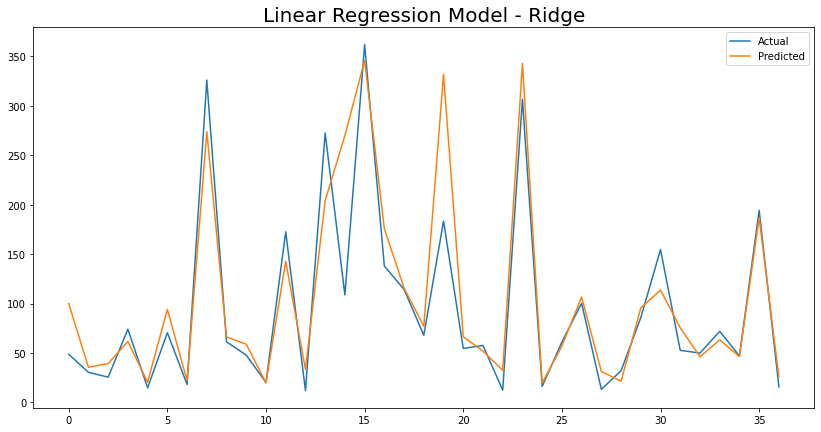

In [145]:
plt.figure(figsize=(14,7))
plt.plot((np.array(y_test)))
plt.plot((y_pred_ridge))

plt.title('Linear Regression Model - Ridge', fontsize= 20)
plt.legend(["Actual","Predicted"])
plt.show()

# <b> Implementing Elastic Net Regression

In [146]:
from sklearn.linear_model import ElasticNet
#a * L1 + b * L2
#alpha = a + b and l1_ratio = a / (a + b)
elasticnet = ElasticNet(alpha=0.1, l1_ratio=0.5)

In [147]:
elasticnet.fit(X_train,y_train)

ElasticNet(alpha=0.1, copy_X=True, fit_intercept=True, l1_ratio=0.5,
           max_iter=1000, normalize=False, positive=False, precompute=False,
           random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

In [148]:
elasticnet.score(X_train, y_train)

0.8881488145703799

In [149]:
y_pred_en = elasticnet.predict(X_test)

## <b>Evaluating the Model Performance

In [150]:
MSE  = mean_squared_error(y_test, y_pred_en)
print("MSE :" , round(MSE,4))

RMSE = np.sqrt(MSE)
print("RMSE :" ,round(RMSE,4))

r2 = r2_score((y_test), (y_pred_en))
print("R2 :" ,round(r2,4))
print("Adjusted R2 : ",round(1-(1-r2_score(y_test, y_pred_en))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)),4))

MSE : 1816.7269
RMSE : 42.6231
R2 : 0.7853
Adjusted R2 :  0.7791


In [151]:
elastic = ElasticNet()
parameters = {'alpha': [1e-15,1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,1,5,10,20,30,40,45,50,55,60,100],'l1_ratio':[0.3,0.4,0.5,0.6,0.7,0.8]}
elastic_regressor = GridSearchCV(elastic, parameters, scoring='neg_mean_squared_error',cv=5)
elastic_regressor.fit(X_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=ElasticNet(alpha=1.0, copy_X=True, fit_intercept=True,
                                  l1_ratio=0.5, max_iter=1000, normalize=False,
                                  positive=False, precompute=False,
                                  random_state=None, selection='cyclic',
                                  tol=0.0001, warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': [1e-15, 1e-13, 1e-10, 1e-08, 1e-05, 0.0001,
                                   0.001, 0.01, 0.1, 1, 5, 10, 20, 30, 40, 45,
                                   50, 55, 60, 100],
                         'l1_ratio': [0.3, 0.4, 0.5, 0.6, 0.7, 0.8]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='neg_mean_squared_error', verbose=0)

In [152]:
print("The best fit alpha value is found out to be :" ,elastic_regressor.best_params_)
print("\nUsing ",elastic_regressor.best_params_, " the negative mean squared error is: ", elastic_regressor.best_score_)

The best fit alpha value is found out to be : {'alpha': 5, 'l1_ratio': 0.3}

Using  {'alpha': 5, 'l1_ratio': 0.3}  the negative mean squared error is:  -1252.1061381555946


In [153]:
y_pred_en = elastic_regressor.predict(X_test)

## <b>Evaluating the Model Performance

In [154]:
MSE  = mean_squared_error(y_test, y_pred_en)
print("MSE :" , round(MSE,4))

RMSE = np.sqrt(MSE)
print("RMSE :" ,round(RMSE,4))

r2 = r2_score((y_test), (y_pred_en))
print("R2 :" ,round(r2,4))
print("Adjusted R2 : ",round(1-(1-r2_score(y_test, y_pred_en))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)),4))

MSE : 1815.6014
RMSE : 42.6099
R2 : 0.7854
Adjusted R2 :  0.7793


# <b> Visualization 

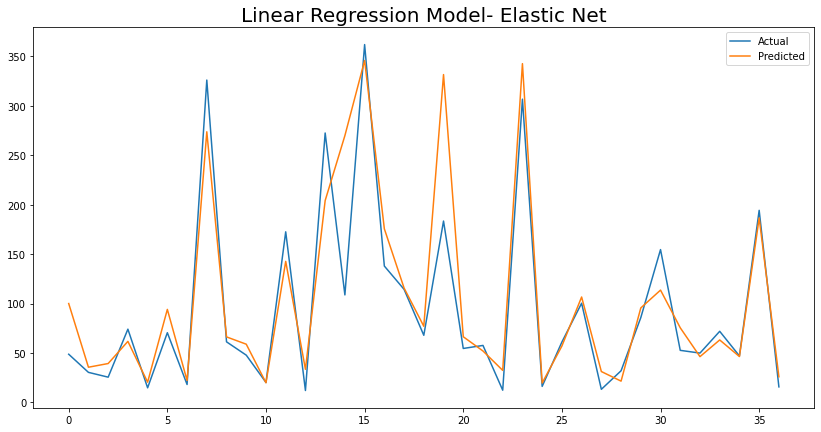

In [155]:
plt.figure(figsize=(14,7))
plt.plot((np.array(y_test)))
plt.plot((y_pred_en))

plt.title('Linear Regression Model- Elastic Net', fontsize= 20)
plt.legend(["Actual","Predicted"])
plt.show()

## <b>Training the Polynomial Regression model on the Training set

In [189]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
poly_reg = PolynomialFeatures(degree = 2)
X_poly = poly_reg.fit_transform(X_train)
regressor = LinearRegression()
regressor.fit(X_poly, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [190]:
poly_pred = regressor.predict(poly_reg.transform(X_test))

# <b> Visualization 

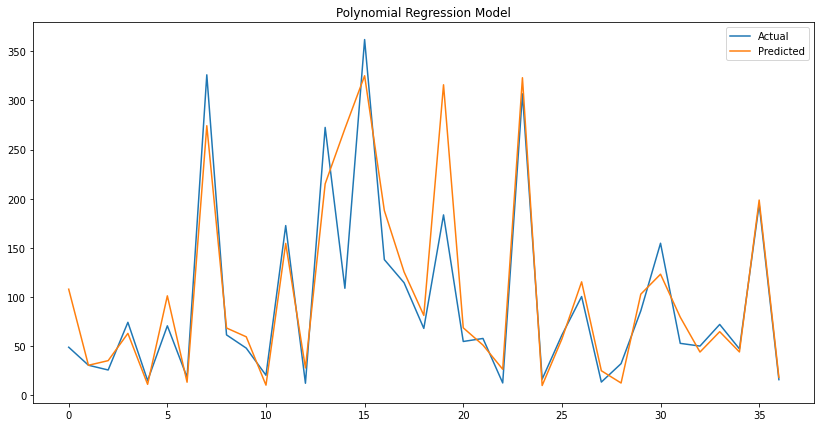

In [191]:
plt.figure(figsize=(14,7))
plt.plot(y_test)
plt.plot(poly_pred)

plt.title('Polynomial Regression Model')
plt.legend(["Actual","Predicted"])
plt.show()

## <b>Evaluating the Model Performance

In [192]:
MSE  = mean_squared_error(y_test, poly_pred)
print("MSE :" , round(MSE,4))

RMSE = np.sqrt(MSE)
print("RMSE :" ,round(RMSE,4))

r2 = r2_score((y_test), (poly_pred))
print("R2 :" ,round(r2,4))
print("Adjusted R2 : ",round(1-(1-r2_score(y_test, poly_pred))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)),4))

MSE : 1711.055
RMSE : 41.3649
R2 : 0.7977
Adjusted R2 :  0.792


## <b>Training the Decision Tree Regression model on the Training set

In [160]:
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor(random_state = 0)
regressor.fit(X_train, y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=0, splitter='best')

##<b> Predicting the Test set results

In [161]:
Dtree_pred = regressor.predict(X_test)

# <b> Visualization 

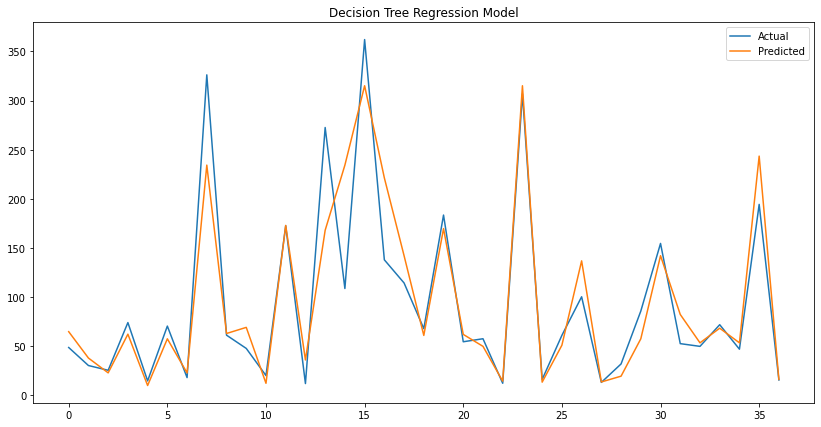

In [162]:
plt.figure(figsize=(14,7))
plt.plot(y_test)
plt.plot(Dtree_pred)

plt.title('Decision Tree Regression Model')
plt.legend(["Actual","Predicted"])
plt.show()

## <b>Evaluating the Model Performance

In [163]:
MSE  = mean_squared_error(y_test, Dtree_pred)
print("MSE :" , round(MSE,4))

RMSE = np.sqrt(MSE)
print("RMSE :" ,round(RMSE,4))

r2 = r2_score((y_test), (Dtree_pred))
print("R2 :" ,round(r2,4))
print("Adjusted R2 : ",round(1-(1-r2_score(y_test, Dtree_pred))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)),4))

MSE : 1437.677
RMSE : 37.9167
R2 : 0.8301
Adjusted R2 :  0.8252


## <b>Training the Random Forest Regression model on the whole dataset

In [164]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators = 3, random_state = 0)
regressor.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=3, n_jobs=None, oob_score=False,
                      random_state=0, verbose=0, warm_start=False)

In [165]:
ran_forest_pred = regressor.predict(X_test)

# <b> Visualization 

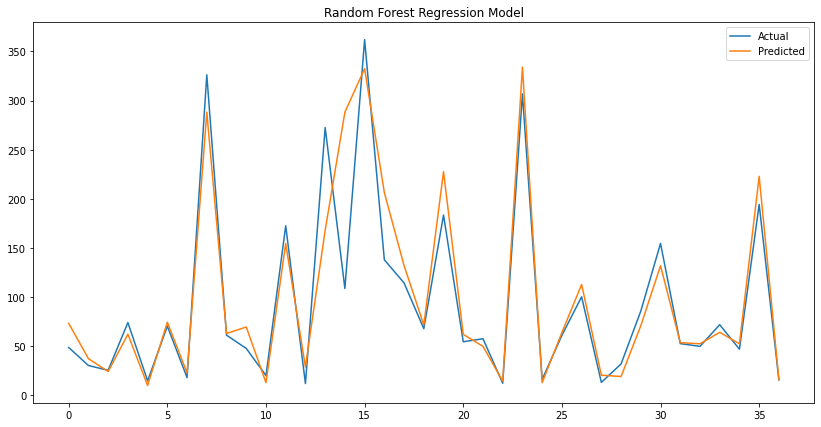

In [166]:
plt.figure(figsize=(14,7))
plt.plot(y_test)
plt.plot(ran_forest_pred)

plt.title('Random Forest Regression Model')
plt.legend(["Actual","Predicted"])
plt.show()

## <b>Evaluating the Model Performance

In [167]:
MSE  = mean_squared_error(y_test, ran_forest_pred)
print("MSE :" , round(MSE,4))

RMSE = np.sqrt(MSE)
print("RMSE :" ,round(RMSE,4))

r2 = r2_score((y_test), (ran_forest_pred))
print("R2 :" ,round(r2,4))
print("Adjusted R2 : ",round(1-(1-r2_score(y_test, ran_forest_pred))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)),4))

MSE : 1549.0944
RMSE : 39.3585
R2 : 0.8169
Adjusted R2 :  0.8117


##<b> Training the Multiple Linear Regression model on the Training set

In [168]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

# <b>Future Prediction

In [169]:
# Create test set for future prediction
X_future = dataset.iloc[:-future_months]['Close']  # eliminate last 'x' months from dataset
X_future = X_future.tail(future_months).values     # take last 'x' months from X_future for future prediction
X_future = X_future.reshape(X_future.shape[0],1)
X_future

array([[25.6 ],
       [11.95],
       [14.37]])

In [170]:
lr_prediction = lr.predict(X_future)
print(lr_prediction)

[31.1063194  18.03442254 20.35193099]


# <b> Visualization 

<function matplotlib.pyplot.show>

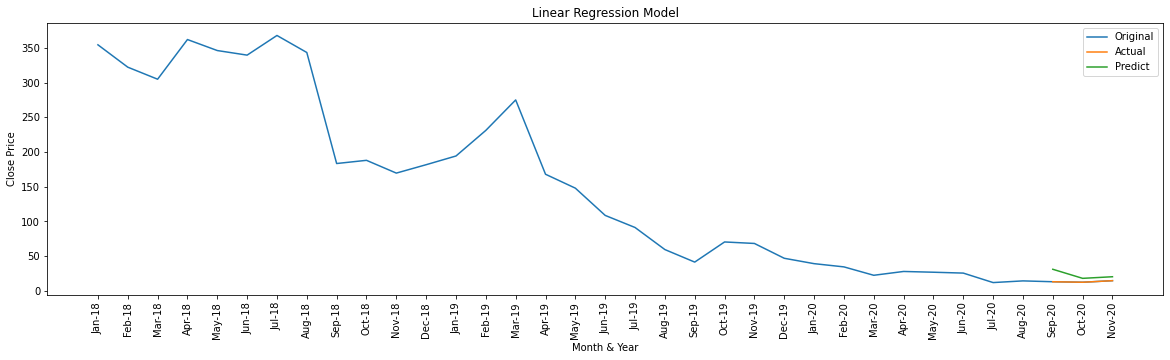

In [171]:
predictions = lr_prediction

valid = dataset[X.shape[0]:]                    # create dataset which contains tha actual value of stock
valid['Prediction'] = predictions               # add the predicted values in the dataset

plt.figure(figsize=(20,5))
plt.title('Linear Regression Model')
plt.xlabel('Month & Year')
plt.ylabel('Close Price')

df = dataset[150:]
plt.plot(df['Close'])
plt.plot(valid[['Close', 'Prediction']])
plt.legend(['Original','Actual', 'Predict'])
plt.xticks(rotation=90)

plt.show

## <b>Evaluating the Model Performance

In [172]:
r2 = r2_score(valid[['Close']].values, valid[['Prediction']].values)
print("R2 :" ,round(r2,4))

R2 : -145.5641


## <b>Training the Polynomial Regression model on the Training set

In [173]:
poly_reg = PolynomialFeatures(degree = 7)
X_poly = poly_reg.fit_transform(X_train)
regressor = LinearRegression()
regressor.fit(X_poly, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [174]:
Poly_prediction = regressor.predict(poly_reg.transform(X_future))

# <b> Visualization 

<function matplotlib.pyplot.show>

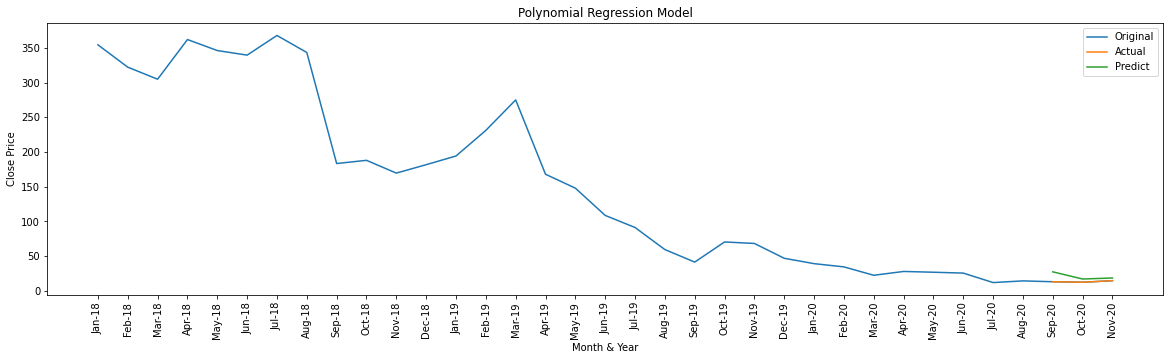

In [175]:
predictions = Poly_prediction

valid = dataset[X.shape[0]:]                    # create dataset which contains tha actual value of stock
valid['Prediction'] = predictions               # add the predicted values in the dataset

plt.figure(figsize=(20,5))
plt.title('Polynomial Regression Model')
plt.xlabel('Month & Year')
plt.ylabel('Close Price')

df = dataset[150:]
plt.plot(df['Close'])
plt.plot(valid[['Close', 'Prediction']])
plt.legend(['Original','Actual', 'Predict'])
plt.xticks(rotation=90)

plt.show

## <b>Evaluating the Model Performance

In [176]:
r2 = r2_score(valid[['Close']].values, valid[['Prediction']].values)
print("R2 :" ,round(r2,4))

R2 : -90.1344


## <b>Training the Decision Tree Regression model on the Training set

In [177]:
tree_pred = DecisionTreeRegressor().fit(X_train, y_train)

In [178]:
tree_prediction = tree_pred.predict(X_future)
print(tree_prediction)

[13.58 12.42  9.98]


# <b> Visualization 

<function matplotlib.pyplot.show>

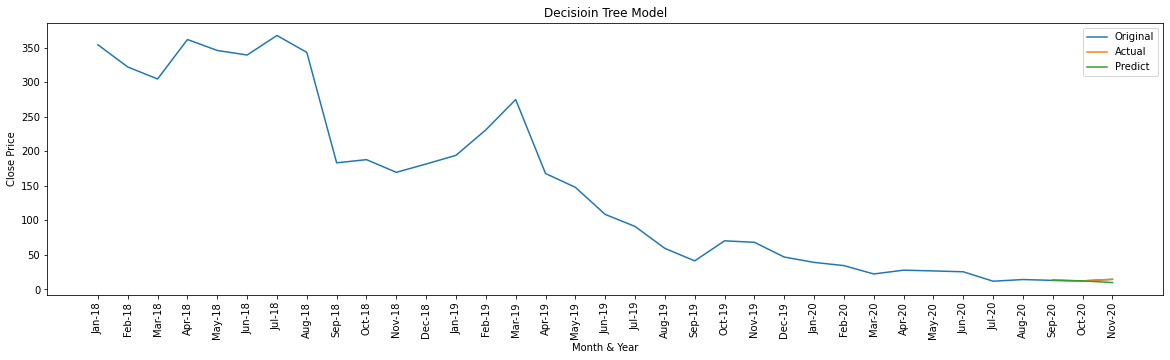

In [179]:
predictions = tree_prediction

valid = dataset[X.shape[0]:]                    # create dataset which contains tha actual value of stock
valid['Prediction'] = predictions               # add the predicted values in the dataset

plt.figure(figsize=(20,5))
plt.title('Decisioin Tree Model')
plt.xlabel('Month & Year')
plt.ylabel('Close Price')

df = dataset[150:]
plt.plot(df['Close'])
plt.plot(valid[['Close', 'Prediction']])
plt.legend(['Original','Actual', 'Predict'])
plt.xticks(rotation=90)

plt.show

## <b>Evaluating the Model Performance

In [180]:
r2 = r2_score(valid[['Close']].values, valid[['Prediction']].values)
print("R2 :" ,round(r2,4))

R2 : -7.417


## <b>Training the Random Forest Regression model on the whole dataset

In [181]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators = 15, random_state = 0)
regressor.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=15, n_jobs=None, oob_score=False,
                      random_state=0, verbose=0, warm_start=False)

In [182]:
Random_forest_prediction = regressor.predict(X_future)

# <b> Visualization 

<function matplotlib.pyplot.show>

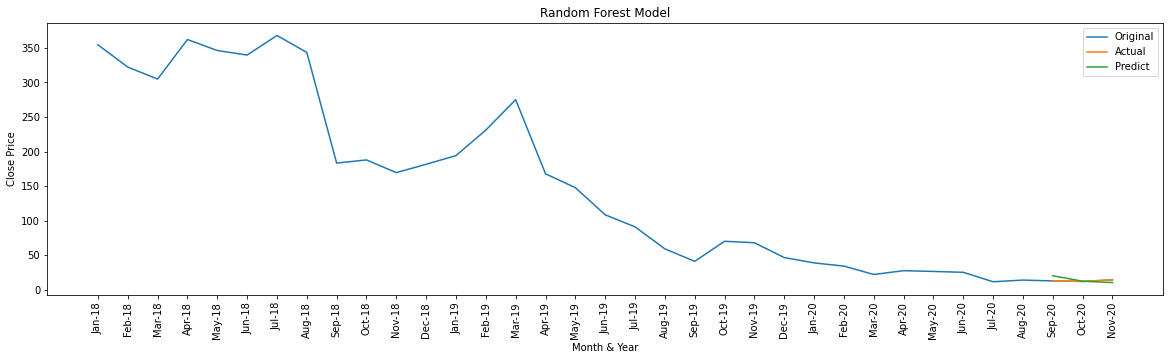

In [183]:
predictions = Random_forest_prediction

valid = dataset[X.shape[0]:]                    # create dataset which contains tha actual value of stock
valid['Prediction'] = predictions               # add the predicted values in the dataset

plt.figure(figsize=(20,5))
plt.title('Random Forest Model')
plt.xlabel('Month & Year')
plt.ylabel('Close Price')

df = dataset[150:]
plt.plot(df['Close'])
plt.plot(valid[['Close', 'Prediction']])
plt.legend(['Original','Actual', 'Predict'])
plt.xticks(rotation=90)

plt.show

## <b>Evaluating the Model Performance

In [184]:
r2 = r2_score(valid[['Close']].values, valid[['Prediction']].values)
print("R2 :" ,round(r2,4))

R2 : -25.9752
